In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from IPython.display import HTML
from Hippocampal import *

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

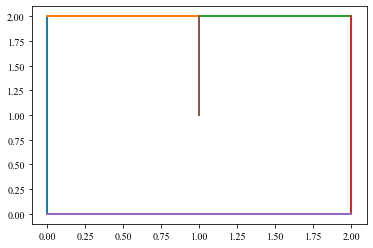

In [2]:
l = []
l.append(line([0, 0], [0, 2], num=50))
l.append(line([0, 2], [1, 2], num=50))
l.append(line([1, 2], [2, 2], num=50))
l.append(line([2, 2], [2, 0], num=50))
l.append(line([2, 0], [0, 0], num=50))
l.append(line([1, 1], [1, 2], num=50))
plot_borders(l)

In [3]:
dist_pref = np.array([0.2, 0.05])
dir_pref = np.linspace(np.pi/2, -np.pi/2, 8, endpoint=True)

In [4]:
x1 = np.linspace([0.1, 0.1], [0.2, 1.9], num=30)
x2 = np.linspace([0.2, 1.9], [0.8, 1.8], num=50)
x3 = np.linspace([0.8, 1.8], [0.8, 0.4], num=60)
x4 = np.linspace([0.8, 0.4], [1.0, 0.7], num=20)
x5 = np.linspace([1.0, 0.7], [0.7, 0.6], num=30)
x6 = np.linspace([0.7, 0.6], [1.1, 0.9], num=50)
x7 = np.linspace([1.1, 0.9], [1.1, 1.9], num=20)
x = np.vstack((x1, x2, x3, x4, x5, x6, x7))
diff = np.diff(x, axis=0)

gridintvl = 20
v = np.zeros((x.shape[0] * gridintvl, x.shape[1]))
for i in range(x.shape[0]-1):
    v[i*gridintvl:(i+1)*gridintvl] = diff[i]
v[:gridintvl] = v[gridintvl]
    
theta = np.zeros(x.shape[0])
theta[1:] = np.arctan2(diff[:, 1], diff[:, 0])
theta[0] = theta[1]

In [5]:
# Get a set of s_init
n = 40
T = 3000
r = 4

grids = [Grid2D(n=n, m=4, l=0.25, a=1.0, lam=5, c0=1.1, c1=2, tau=10, 
                print_param=False) 
         for _ in range(r*r)]
s_init_s = np.zeros((r*r, n, n))
for i, g in enumerate(grids):
    s_init_s[i] = g(alpha=0, T=T, v=np.zeros((T, 2)), print_param=False)[0][-1]

In [6]:
T = v.shape[0]
alphas = (3, 4)
s_s = np.zeros((T, len(alphas), r*r, n, n))

for i, alpha in enumerate(alphas):
    for j, g in enumerate(grids):
        s_s[:, i, j, :] = g(alpha=alpha, T=T, v=v, s_init=s_init_s[j], 
                            print_param=False)[0]

In [5]:
bs = BVC(dist_pref, dir_pref, 5, 0.1, np.pi/10, 0.3)
f, vis = bs(x, theta, l)

(2, 47)
(2, 50)
(2, 0)
(2, 50)
(2, 3)
(2, 50)
(2, 45)
(2, 50)
(2, 0)
(2, 42)
(2, 50)
(2, 44)
(2, 50)
(2, 0)
(2, 39)
(2, 50)
(2, 42)
(2, 50)
(2, 0)
(2, 36)
(2, 50)
(2, 41)
(2, 50)
(2, 0)
(2, 34)
(2, 50)
(2, 39)
(2, 50)
(2, 0)
(2, 30)
(2, 50)
(2, 38)
(2, 50)
(2, 0)
(2, 27)
(2, 50)
(2, 36)
(2, 50)
(2, 0)
(2, 24)
(2, 50)
(2, 35)
(2, 50)
(2, 0)
(2, 21)
(2, 50)
(2, 33)
(2, 50)
(2, 0)
(2, 18)
(2, 50)
(2, 32)
(2, 50)
(2, 0)
(2, 14)
(2, 50)
(2, 30)
(2, 50)
(2, 0)
(2, 12)
(2, 50)
(2, 29)
(2, 50)
(2, 0)
(2, 8)
(2, 50)
(2, 27)
(2, 50)
(2, 0)
(2, 5)
(2, 50)
(2, 26)
(2, 50)
(2, 0)
(2, 2)
(2, 50)
(2, 24)
(2, 50)
(2, 0)
(2, 0)
(2, 50)
(2, 23)
(2, 50)
(2, 0)
(2, 0)
(2, 47)
(2, 21)
(2, 50)
(2, 0)
(2, 0)
(2, 44)
(2, 19)
(2, 50)
(2, 0)
(2, 0)
(2, 41)
(2, 18)
(2, 50)
(2, 0)
(2, 0)
(2, 38)
(2, 16)
(2, 50)
(2, 0)
(2, 0)
(2, 35)
(2, 15)
(2, 50)
(2, 0)
(2, 0)
(2, 32)
(2, 13)
(2, 50)
(2, 0)
(2, 0)
(2, 29)
(2, 12)
(2, 50)
(2, 0)
(2, 0)
(2, 26)
(2, 10)
(2, 50)
(2, 0)
(2, 0)
(2, 23)
(2, 9)
(2, 50)
(2, 0)
(2, 0)
(2

In [8]:
# fig, ax = plt.subplots(2, 8, figsize=(12, 3), sharex='all', sharey='all')
# for i in range(16):
#     ax[i//8, i%8].plot(f[:, i//8, i%8])
#     ax[i//8, i%8].set_title('%d: %.2f, %.2f' % (i, dist_pref[i//8], dir_pref[i%8]))
# fig.tight_layout()

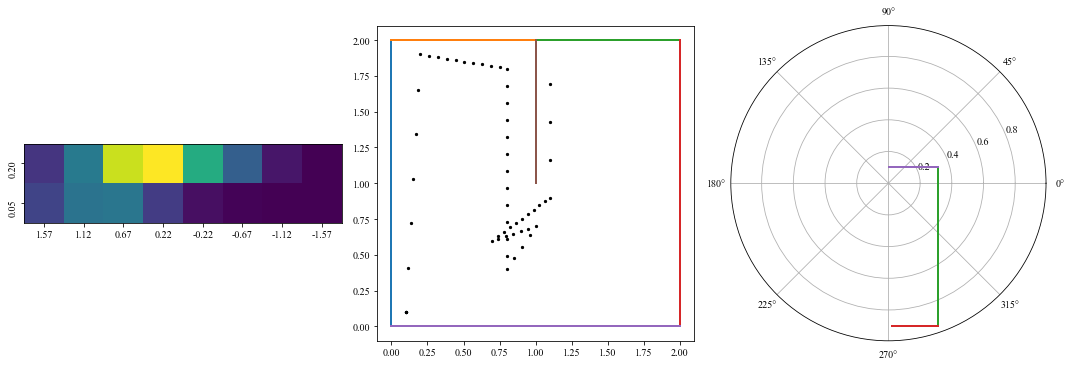

In [6]:
var = {'bvc': f, 'traj': (l, x), 'vis': vis}#, 'grid': s_s[:, 1, 0]}
labels = {'bvc_alpha': dir_pref, 'bvc_d': dist_pref}
ani = animate(var, x.shape[0], labels=labels, intvl=5, gridintvl=gridintvl)
HTML(ani.to_jshtml()) # Jupyter

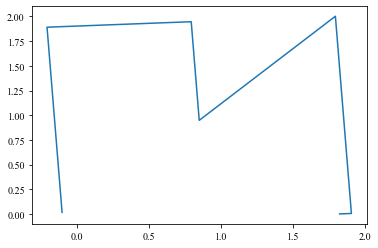

In [8]:
v = np.hstack(vis[0])
idx = np.argsort(v[1])
v = v[:, idx]
v[1] += np.pi / 2
# v[1, v[1] < -np.pi] += 2 * np.pi
# v[1, v[1] > np.pi] -= 2 * np.pi
plt.plot(v[0] * np.cos(v[1]), v[0] * np.sin(v[1]))